In [1]:
import tensorflow as tf

2025-02-04 23:52:53.430135: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-04 23:52:53.472242: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738693373.482821  547013 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738693373.486166  547013 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-04 23:52:53.497552: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
IMG_SIZE = (224, 224)  # Resize images to 150x150 pixels
BATCH_SIZE = 32        # Number of images processed at once

# Create an ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,      # Normalize pixel values to [0, 1]
    rotation_range=20,   # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2, # Randomly shift images vertically
    shear_range=0.2,     # Shear transformation
    zoom_range=0.2,      # Randomly zoom in on images
    horizontal_flip=True, # Randomly flip images horizontally
    fill_mode='nearest'  # Fill missing pixels after transformations
)

In [3]:
# Paths to dataset folders
train_dir = '/home/nikunj/Documents/Project/dataset/train'
test_dir = '/home/nikunj/Documents/Project/dataset/test'

# Load training data
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)


# val_data = datagen.flow_from_directory(
#     train_dir,
#     target_size=IMG_SIZE,
#     batch_size=BATCH_SIZE,
#     class_mode='categorical',
#     subset='validation'  # Validation subset
# )

# # Load validation data (20% of the data)
# val_data = datagen.flow_from_directory(
#     train_dir,
#     target_size=IMG_SIZE,
#     batch_size=BATCH_SIZE,
#     class_mode='categorical',
#     subset='validation'  # Validation subset
# )

# Load test data
test_data = datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Don't shuffle test data for evaluation
)


Found 13403 images belonging to 21 classes.
Found 1521 images belonging to 20 classes.


In [4]:
import tensorflow as tf

# Check if TensorFlow can access GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"Number of GPUs Available: {len(gpus)}")
    for gpu in gpus:
        print(f"GPU Detected: {gpu}")
else:
    print("No GPUs detected. TensorFlow is using the CPU.")

Number of GPUs Available: 1
GPU Detected: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [5]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load EfficientNetB0 without the top layers
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = True

# Add custom layers on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Reduce feature maps to a vector
    Dense(128, activation='relu'),  # Fully connected layer
    Dense(train_data.num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


I0000 00:00:1738693384.168267  547013 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4274 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [6]:
from sklearn.utils import class_weight
import numpy as np

# # Compute class weights
# class_weights = class_weight.compute_class_weight(
#     'balanced',
#     classes=np.unique(train_data.classes),
#     y=train_data.classes
# )

# class_weights_dict = dict(enumerate(class_weights))

# Pass class weights to model.fit()
history = model.fit(
    train_data,
    epochs=15,
    # class_weight=class_weights_dict
)

/home/nikunj/.local/share/virtualenvs/Project-T7e7dcFu/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


I0000 00:00:1738693400.955518  547306 service.cc:148] XLA service 0x7142fc013c10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738693400.955533  547306 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-02-04 23:53:21.431771: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738693403.244038  547306 cuda_dnn.cc:529] Loaded cuDNN version 90700
2025-02-04 23:53:24.816612: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_20840', 16 bytes spill stores, 16 bytes spill loads

2025-02-04 23:53:24.944486: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_208

  1/419 ━━━━━━━━━━━━━━━━━━━━ 4:49:58 42s/step - accuracy: 0.0000e+00 - loss: 3.2260

I0000 00:00:1738693428.191296  547306 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


261/419 ━━━━━━━━━━━━━━━━━━━━ 41s 266ms/step - accuracy: 0.3903 - loss: 1.9647

2025-02-04 23:55:00.892683: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_20840', 16 bytes spill stores, 16 bytes spill loads

2025-02-04 23:55:01.053257: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_20840_0', 332 bytes spill stores, 508 bytes spill loads

2025-02-04 23:55:01.272405: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_20840', 144 bytes spill stores, 144 bytes spill loads

2025-02-04 23:55:01.466599: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_20990', 24 bytes spill stores, 24 bytes spill loads

2025-02-04 23:55:01.513034: I external/local_xla/x

419/419 ━━━━━━━━━━━━━━━━━━━━ 178s 325ms/step - accuracy: 0.4339 - loss: 1.7948
Epoch 2/15
419/419 ━━━━━━━━━━━━━━━━━━━━ 111s 264ms/step - accuracy: 0.6413 - loss: 1.0521
Epoch 3/15
419/419 ━━━━━━━━━━━━━━━━━━━━ 110s 263ms/step - accuracy: 0.6823 - loss: 0.9210
Epoch 4/15
419/419 ━━━━━━━━━━━━━━━━━━━━ 153s 365ms/step - accuracy: 0.7126 - loss: 0.8340
Epoch 5/15
419/419 ━━━━━━━━━━━━━━━━━━━━ 209s 498ms/step - accuracy: 0.7407 - loss: 0.7492
Epoch 6/15
419/419 ━━━━━━━━━━━━━━━━━━━━ 232s 554ms/step - accuracy: 0.7599 - loss: 0.6954
Epoch 7/15
419/419 ━━━━━━━━━━━━━━━━━━━━ 248s 592ms/step - accuracy: 0.7758 - loss: 0.6492
Epoch 8/15
419/419 ━━━━━━━━━━━━━━━━━━━━ 141s 336ms/step - accuracy: 0.7866 - loss: 0.6108
Epoch 9/15
419/419 ━━━━━━━━━━━━━━━━━━━━ 110s 261ms/step - accuracy: 0.7908 - loss: 0.5871
Epoch 10/15
419/419 ━━━━━━━━━━━━━━━━━━━━ 109s 261ms/step - accuracy: 0.8094 - loss: 0.5416
Epoch 11/15
419/419 ━━━━━━━━━━━━━━━━━━━━ 109s 261ms/step - accuracy: 0.8117 - loss: 0.5248
Epoch 12/15
419/419

In [7]:
# # Train the model
# history = model.fit(
#     train_data,
#     epochs=10,  # Start with 10 epochs
#     # validation_data=val_data
# )

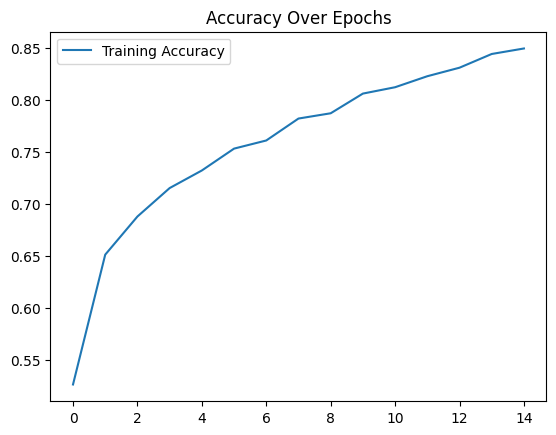

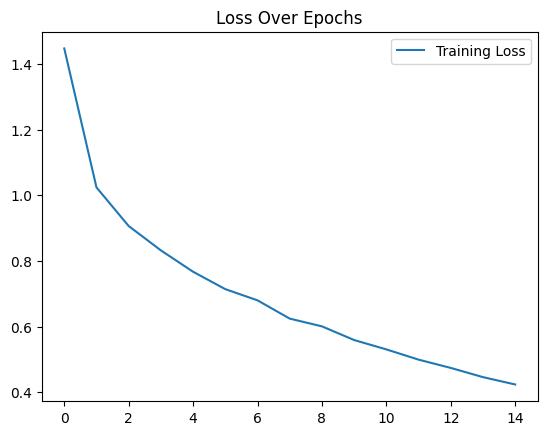

In [8]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')

plt.legend()
plt.title('Loss Over Epochs')
plt.show()

In [9]:
# Unfreeze the base model
base_model.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
fine_tune_epochs = 5
total_epochs = 10 + fine_tune_epochs  # Add fine-tuning epochs to previous epochs

history_fine = model.fit(
    train_data,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
   
)

Epoch 15/15
419/419 ━━━━━━━━━━━━━━━━━━━━ 161s 295ms/step - accuracy: 0.8826 - loss: 0.3328


In [10]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.2f}")

ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 20), output.shape=(None, 21)

In [17]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load a test image
img_path = '/home/nikunj/Documents/Project/dataset/test/longsleeve/11f2ff4e-6b43-4071-b5b1-2036ec0fe8fe.jpg'
img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Map predicted class to category name
class_names = list(train_data.class_indices.keys())
print("Predicted Category:", class_names[predicted_class[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Category: longsleeve


In [ ]:
# Save the model
model.save('my_model.keras')
print("Model saved successfully.")

Model saved successfully.
